In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import hvplot.pandas
from pathlib import Path
from finta import TA
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [7]:
fut1 = yf.Ticker("GEZ22.CME")

fut1_df = fut1.history(period="150d", interval="1h")
fut1_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2022-04-26 00:00:00-04:00,96.864998,96.870003,96.860001,96.870003,0,0,0
2022-04-26 01:00:00-04:00,96.870003,96.885002,96.860001,96.885002,1257,0,0
2022-04-26 02:00:00-04:00,96.885002,96.915001,96.879997,96.915001,3658,0,0
2022-04-26 03:00:00-04:00,96.915001,96.919998,96.900002,96.910004,4117,0,0
2022-04-26 04:00:00-04:00,96.904999,96.925003,96.904999,96.915001,4759,0,0
...,...,...,...,...,...,...,...
2022-10-17 09:00:00-04:00,94.925003,94.930000,94.915001,94.915001,23444,0,0
2022-10-17 10:00:00-04:00,94.915001,94.919998,94.910004,94.915001,9248,0,0
2022-10-17 11:00:00-04:00,94.915001,94.919998,94.910004,94.910004,113091,0,0
2022-10-17 12:00:00-04:00,94.915001,94.925003,94.910004,94.915001,18842,0,0


In [8]:
fut1_df = fut1_df.drop(columns=["Dividends", "Stock Splits"])

fut1_df

,Open,High,Low,Close,Volume
2022-04-26 00:00:00-04:00,96.864998,96.870003,96.860001,96.870003,0
2022-04-26 01:00:00-04:00,96.870003,96.885002,96.860001,96.885002,1257
2022-04-26 02:00:00-04:00,96.885002,96.915001,96.879997,96.915001,3658
2022-04-26 03:00:00-04:00,96.915001,96.919998,96.900002,96.910004,4117
2022-04-26 04:00:00-04:00,96.904999,96.925003,96.904999,96.915001,4759
...,...,...,...,...,...
2022-10-17 09:00:00-04:00,94.925003,94.930000,94.915001,94.915001,23444
2022-10-17 10:00:00-04:00,94.915001,94.919998,94.910004,94.915001,9248
2022-10-17 11:00:00-04:00,94.915001,94.919998,94.910004,94.910004,113091
2022-10-17 12:00:00-04:00,94.915001,94.925003,94.910004,94.915001,18842


In [10]:
fut1_df["Price Weighted Moving AVG"] = fut1_df["Close"].rolling(window=30).mean()

In [11]:
fut1_df["Volume Weighted Moving AVG"] = fut1_df["Volume"].rolling(window=30).mean()

fut1_df.head()

,Open,High,Low,Close,Volume,Price Weighted Moving AVG,Volume Weighted Moving AVG
2022-04-26 00:00:00-04:00,96.864998,96.870003,96.860001,96.870003,0,NaN,NaN
2022-04-26 01:00:00-04:00,96.870003,96.885002,96.860001,96.885002,1257,NaN,NaN
2022-04-26 02:00:00-04:00,96.885002,96.915001,96.879997,96.915001,3658,NaN,NaN
2022-04-26 03:00:00-04:00,96.915001,96.919998,96.900002,96.910004,4117,NaN,NaN
2022-04-26 04:00:00-04:00,96.904999,96.925003,96.904999,96.915001,4759,NaN,NaN


In [12]:
fut1_df=fut1_df.dropna()

fut1_df

,Open,High,Low,Close,Volume,Price Weighted Moving AVG,Volume Weighted Moving AVG
2022-04-27 06:00:00-04:00,96.934998,96.959999,96.930000,96.955002,6872,96.949168,5910.766667
2022-04-27 07:00:00-04:00,96.949997,96.989998,96.949997,96.989998,8087,96.953167,6180.333333
2022-04-27 08:00:00-04:00,96.985001,97.014999,96.974998,97.014999,14961,96.957501,6637.133333
2022-04-27 09:00:00-04:00,97.010002,97.014999,96.959999,96.985001,21763,96.959834,7240.633333
2022-04-27 10:00:00-04:00,96.985001,97.000000,96.970001,96.970001,10443,96.961834,7451.500000
...,...,...,...,...,...,...,...
2022-10-17 09:00:00-04:00,94.925003,94.930000,94.915001,94.915001,23444,94.914000,8553.666667
2022-10-17 10:00:00-04:00,94.915001,94.919998,94.910004,94.915001,9248,94.912667,8801.100000
2022-10-17 11:00:00-04:00,94.915001,94.919998,94.910004,94.910004,113091,94.910833,12507.100000
2022-10-17 12:00:00-04:00,94.915001,94.925003,94.910004,94.915001,18842,94.909667,13031.766667


In [13]:
fut1_df["Price Lower Than Weighted Moving AVG"] = fut1_df["Price Weighted Moving AVG"] > fut1_df["Close"]

C:\Users\17045\anaconda3\envs\atmdev2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
fut1_df["Volume Higher than Weighted Moving AVG"] = fut1_df["Volume Weighted Moving AVG"] > fut1_df["Volume"]

C:\Users\17045\anaconda3\envs\atmdev2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
fut1_df.tail(10)

,Open,High,Low,Close,Volume,Price Weighted Moving AVG,Volume Weighted Moving AVG,Price Lower Than Weighted Moving AVG,Volume Higher than Weighted Moving AVG
2022-10-17 04:00:00-04:00,94.919998,94.919998,94.910004,94.910004,2298,94.920666,6266.000000,True,True
2022-10-17 05:00:00-04:00,94.910004,94.915001,94.904999,94.904999,2283,94.919166,6324.766667,True,True
2022-10-17 06:00:00-04:00,94.900002,94.910004,94.889999,94.904999,9448,94.917833,6555.666667,True,False
2022-10-17 07:00:00-04:00,94.904999,94.919998,94.904999,94.910004,7527,94.916500,6795.666667,True,False
2022-10-17 08:00:00-04:00,94.915001,94.925003,94.900002,94.925003,31957,94.915500,7843.100000,False,False
2022-10-17 09:00:00-04:00,94.925003,94.930000,94.915001,94.915001,23444,94.914000,8553.666667,False,False
2022-10-17 10:00:00-04:00,94.915001,94.919998,94.910004,94.915001,9248,94.912667,8801.100000,False,False
2022-10-17 11:00:00-04:00,94.915001,94.919998,94.910004,94.910004,113091,94.910833,12507.100000,True,False
2022-10-17 12:00:00-04:00,94.915001,94.925003,94.910004,94.915001,18842,94.909667,13031.766667,False,False
2022-10-17 12:54:38-04:00,94.915001,94.915001,94.915001,94.915001,0,94.908834,12777.266667,False,True


<AxesSubplot:>

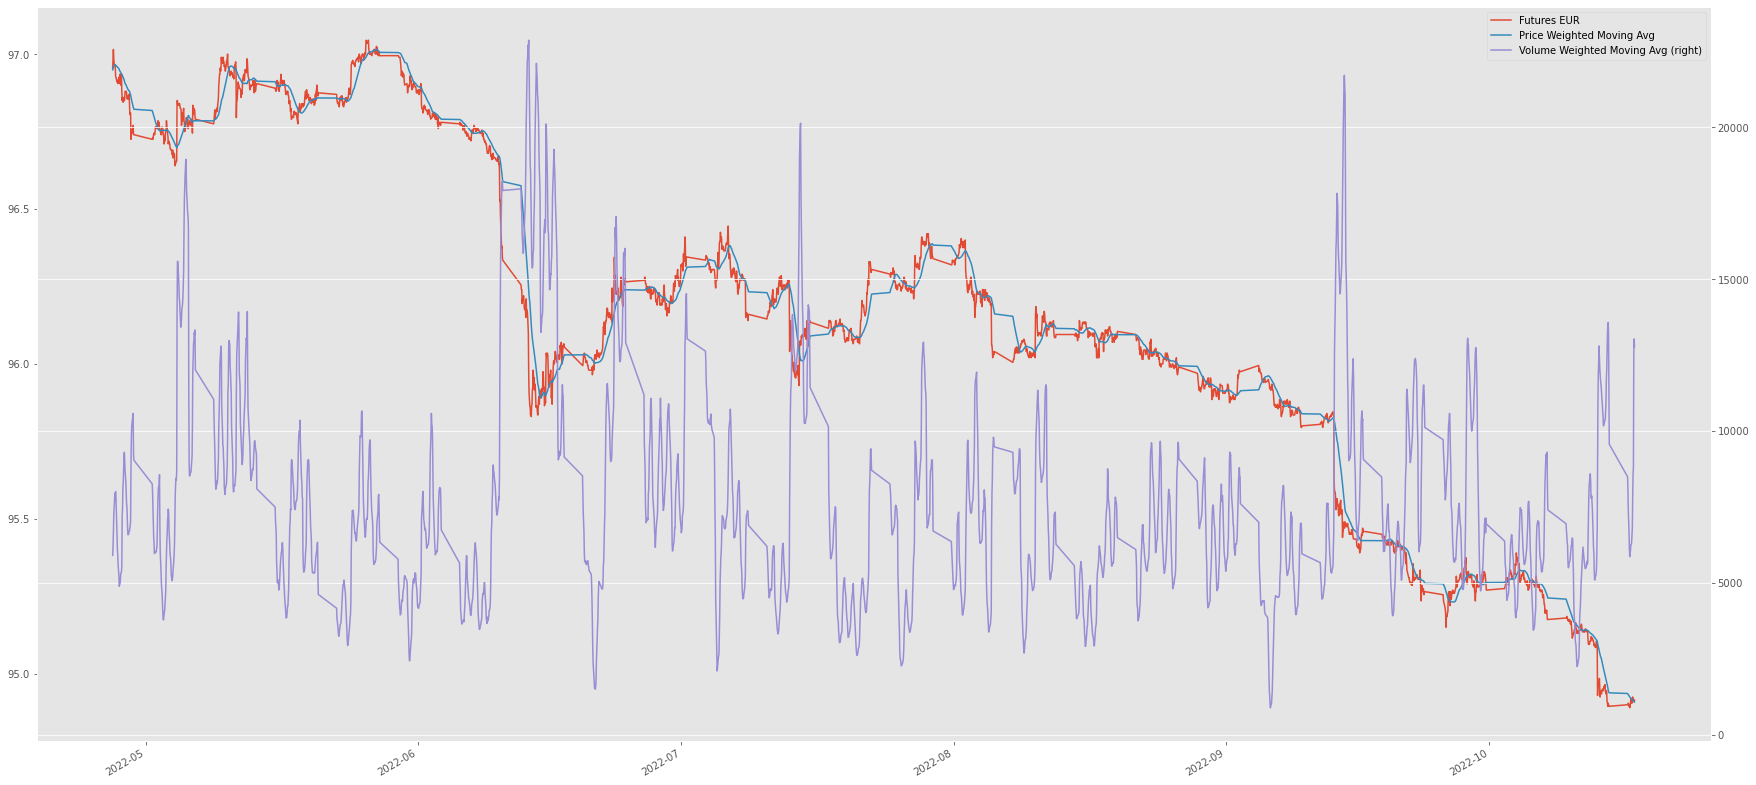

In [16]:
fut1_close_price = fut1_df["Close"]
pwmavg = fut1_df["Price Weighted Moving AVG"]
vwmavg = fut1_df["Volume Weighted Moving AVG"]

plt.rc('figure', figsize=(30,15))
plt.style.use('ggplot')

fut1_close_price.plot(label="Futures EUR", legend=True)
pwmavg.plot(label='Price Weighted Moving Avg', legend=True)
vwmavg.plot(secondary_y = True, label="Volume Weighted Moving Avg", legend=True)

In [19]:
fut1_signals_df = pd.DataFrame()
fut1_signals_df["Close"] = fut1_df["Close"]
fut1_signals_df["Signal"] = 0.0
fut1_signals_df["Signal"] = fut1_df["Volume Higher than Weighted Moving AVG"] * fut1_df["Price Lower Than Weighted Moving AVG"]
fut1_signals_df["Signal"] = fut1_signals_df["Signal"].astype(int)
fut1_signals_df["Entry/Exit"] = fut1_signals_df["Signal"].diff()
fut1_signals_df.head(10)


,Close,Signal,Entry/Exit
2022-04-27 06:00:00-04:00,96.955002,0,NaN
2022-04-27 07:00:00-04:00,96.989998,0,0.0
2022-04-27 08:00:00-04:00,97.014999,0,0.0
2022-04-27 09:00:00-04:00,96.985001,0,0.0
2022-04-27 10:00:00-04:00,96.970001,0,0.0
2022-04-27 11:00:00-04:00,96.964996,0,0.0
2022-04-27 12:00:00-04:00,96.964996,0,0.0
2022-04-27 13:00:00-04:00,96.959999,1,1.0
2022-04-27 14:00:00-04:00,96.930000,0,-1.0
2022-04-27 15:00:00-04:00,96.925003,0,0.0


In [20]:
# Visualize entry position relative to close price
entry = fut1_signals_df[fut1_signals_df["Entry/Exit"] == 1.0]["Close"].hvplot.scatter(
    color='purple',
    marker='^',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize exit position relative to close price
exit = fut1_signals_df[fut1_signals_df["Entry/Exit"] == -1.0]["Close"].hvplot.scatter(
    color='orange',
    marker='v',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize close price for the futures contract
security_close = fut1_signals_df[["Close"]].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize weighted moving averages
weighted_moving_avgs = fut1_df[["Price Weighted Moving AVG"]].hvplot(
    ylabel='Price in $',
    width=1000,
    height=400
)

# Overlay plots
entry_exit_plot = security_close * weighted_moving_avgs * entry * exit
entry_exit_plot

:Overlay
   .Curve.I          :Curve   [index]   (Close)
   .Curve.II         :Curve   [index]   (Price Weighted Moving AVG)
   .Scatter.Close.I  :Scatter   [index]   (Close)
   .Scatter.Close.II :Scatter   [index]   (Close)

In [22]:
z = 1
profit_or_loss = 0.00
starting_price = (fut1_df['Close'].head(1))
starting_price = float(starting_price)

ending_price = (fut1_df['Close'].tail(1))
ending_price = float(ending_price)

#returns = (profit_or_loss / starting_price)
#return_pct = "{:.2%}".format(returns)

In [23]:
print("Futures EUR Momentum Trading Results:", "\n")
print("The starting price is: $", round(starting_price,2))
print("The ending price is: $", round(ending_price,2), "\n")

#Getting buy and sell dates
for index, row in fut1_signals_df.iterrows():
 #   if row['Volume Higher than Weighted Moving AVG'] == 1:
       # if row['Price Lower Than Weighted Moving AVG'] == 1:
    if row['Signal'] == 1:
        if row['Entry/Exit'] != -1:
            if z == 1:
                print (index, round(row['Close'],2), '- Buy')
                close = row['Close']
                profit_or_loss = profit_or_loss - close
                z = z - 1
                
    else:
     #   if row['Volume Higher than Weighted Moving AVG'] == 0:
      #      if row['Price Lower Than Weighted Moving AVG'] == 0:
            if row['Entry/Exit'] == -1:
                if z == 0:
                    print (index, round(row['Close'],2), '- Sell')
                    close = row['Close'] 
                    profit_or_loss = profit_or_loss + close
                    returns = (profit_or_loss / starting_price)
                    return_pct = "{:.2%}".format(returns)
                    print ("Total Profit/Loss is $",round(profit_or_loss,2))
                    print ("Total Return Percentage is", return_pct, "\n")
                    z = z + 1
                    

                    
entire_hold_return = (ending_price - starting_price)
entire_hold_pct = "{:.2%}".format((ending_price - starting_price) / starting_price)
print("The return for holding for the entire period was $",round(entire_hold_return,2), "or", entire_hold_pct, ".")
profit_or_loss = 0.00      

Futures EUR Momentum Trading Results: 

The starting price is: $ 96.96
The ending price is: $ 94.92 

2022-04-27 13:00:00-04:00 96.96 - Buy
2022-04-27 14:00:00-04:00 96.93 - Sell
Total Profit/Loss is $ -0.03
Total Return Percentage is -0.03% 

2022-04-27 16:00:00-04:00 96.92 - Buy
2022-04-28 04:00:00-04:00 96.9 - Sell
Total Profit/Loss is $ -0.05
Total Return Percentage is -0.05% 

2022-04-28 05:00:00-04:00 96.92 - Buy
2022-04-28 07:00:00-04:00 96.88 - Sell
Total Profit/Loss is $ -0.08
Total Return Percentage is -0.09% 

2022-04-28 11:00:00-04:00 96.85 - Buy
2022-04-28 12:00:00-04:00 96.85 - Sell
Total Profit/Loss is $ -0.08
Total Return Percentage is -0.08% 

2022-04-28 15:00:00-04:00 96.86 - Buy
2022-04-28 16:00:00-04:00 96.88 - Sell
Total Profit/Loss is $ -0.06
Total Return Percentage is -0.06% 

2022-04-28 18:00:00-04:00 96.88 - Buy
2022-04-29 08:00:00-04:00 96.72 - Sell
Total Profit/Loss is $ -0.22
Total Return Percentage is -0.22% 

2022-04-29 12:00:00-04:00 96.75 - Buy
2022-04-2

2022-09-23 10:00:00-04:00 95.26 - Buy
2022-09-23 11:00:00-04:00 95.27 - Sell
Total Profit/Loss is $ -0.5
Total Return Percentage is -0.52% 

2022-09-23 13:00:00-04:00 95.26 - Buy
2022-09-26 02:00:00-04:00 95.15 - Sell
Total Profit/Loss is $ -0.61
Total Return Percentage is -0.63% 

2022-09-26 04:00:00-04:00 95.18 - Buy
2022-09-26 06:00:00-04:00 95.2 - Sell
Total Profit/Loss is $ -0.6
Total Return Percentage is -0.62% 

2022-09-26 07:00:00-04:00 95.2 - Buy
2022-09-26 08:00:00-04:00 95.26 - Sell
Total Profit/Loss is $ -0.54
Total Return Percentage is -0.56% 

2022-09-28 18:00:00-04:00 95.31 - Buy
2022-09-29 06:00:00-04:00 95.3 - Sell
Total Profit/Loss is $ -0.55
Total Return Percentage is -0.57% 

2022-09-29 07:00:00-04:00 95.29 - Buy
2022-09-29 09:00:00-04:00 95.26 - Sell
Total Profit/Loss is $ -0.58
Total Return Percentage is -0.60% 

2022-09-29 11:00:00-04:00 95.26 - Buy
2022-09-29 14:00:00-04:00 95.32 - Sell
Total Profit/Loss is $ -0.53
Total Return Percentage is -0.55% 

2022-09-29 

In [24]:
fut1_price_plot = fut1_df["Close"].hvplot.line(title="FUT EUR Price")
fut1_price_plot

:Curve   [index]   (Close)

In [ ]:
snp_price = snp_df[['Close']]
scaler = MinMaxScaler(feature_range=(-1,1))
snp_price['Close']=scaler.fit_transform(snp_price['Close'].values.reshape(-1,1))

In [13]:
fut2 = yf.Ticker("CLZ22.NYM")

fut2_df = fut2.history(period="150d", interval="1h")
fut2_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2022-04-25 00:00:00-04:00,90.790001,90.980003,90.599998,90.650002,0,0,0
2022-04-25 01:00:00-04:00,90.739998,91.120003,90.430000,90.629997,300,0,0
2022-04-25 02:00:00-04:00,90.629997,90.739998,90.050003,90.260002,1415,0,0
2022-04-25 03:00:00-04:00,90.209999,90.629997,90.089996,90.190002,590,0,0
2022-04-25 04:00:00-04:00,90.180000,90.250000,89.690002,89.709999,1554,0,0
...,...,...,...,...,...,...,...
2022-10-14 15:00:00-04:00,84.760002,84.889999,84.570000,84.779999,3608,0,0
2022-10-14 16:00:00-04:00,84.769997,84.820000,84.540001,84.540001,2527,0,0
2022-10-16 18:00:00-04:00,84.629997,85.260002,84.500000,85.230003,2608,0,0
2022-10-16 19:00:00-04:00,85.250000,85.260002,85.150002,85.190002,69,0,0


In [14]:
fut2_df = fut2_df.drop(columns=["Dividends", "Stock Splits"])

fut2_df

,Open,High,Low,Close,Volume
2022-04-25 00:00:00-04:00,90.790001,90.980003,90.599998,90.650002,0
2022-04-25 01:00:00-04:00,90.739998,91.120003,90.430000,90.629997,300
2022-04-25 02:00:00-04:00,90.629997,90.739998,90.050003,90.260002,1415
2022-04-25 03:00:00-04:00,90.209999,90.629997,90.089996,90.190002,590
2022-04-25 04:00:00-04:00,90.180000,90.250000,89.690002,89.709999,1554
...,...,...,...,...,...
2022-10-14 15:00:00-04:00,84.760002,84.889999,84.570000,84.779999,3608
2022-10-14 16:00:00-04:00,84.769997,84.820000,84.540001,84.540001,2527
2022-10-16 18:00:00-04:00,84.629997,85.260002,84.500000,85.230003,2608
2022-10-16 19:00:00-04:00,85.250000,85.260002,85.150002,85.190002,69
